# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Agrupamento baseado em Densidade (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
import time

# Carregando base de dados

O dataset cardio2D foi gerado a partir do Cardiotocogrpahy dataset [1,2], disponível na UCI. Consiste em medições da frequência cardíaca fetal (FHR) e recursos de contração uterina (UC) em cardiotocogramas classificados por obstetras especializados.

Esse dataset é uma projeção 2D do dataset original, contendo 1831 instâncias.

[1] http://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/

[2] https://archive.ics.uci.edu/ml/datasets/Cardiotocography

In [ ]:
df = pd.read_csv('cardio2D.csv')
df

,attr1,attr2
0,1.270457,-26.484255
1,1.274544,-26.505440
2,14.631669,-9.029656
3,14.691931,-8.939358
4,8.633727,0.808449
...,...,...
1826,-23.833060,-49.713450
1827,-23.584906,-49.605743
1828,-23.866812,-49.851200
1829,-23.742155,-50.052105


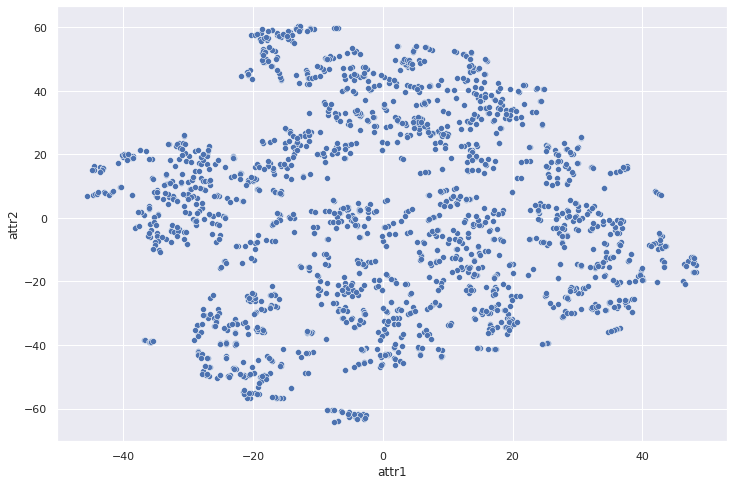

In [ ]:
sns.scatterplot(data=df, x='attr1', y='attr2')

# Experimentando o k-Means

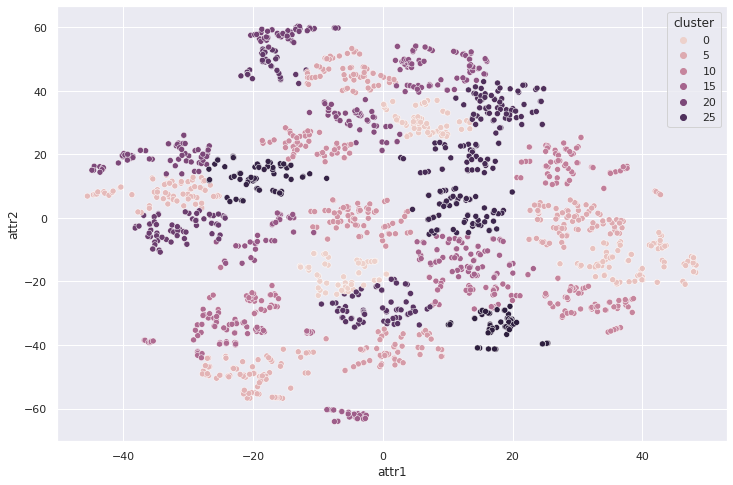

In [ ]:
import numpy as np

num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters).fit(df)
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='attr1', y='attr2',hue='cluster')

# Executando o DBSCAN com valores *default* para parâmetros 

* eps default=0.5

* min_samples  default=5

* metric default='euclidean'



In [ ]:
clustering = DBSCAN().fit(df)  # usando valores default
df['cluster'] = clustering.labels_
df

,attr1,attr2,cluster
0,1.270457,-26.484255,-1
1,1.274544,-26.505440,-1
2,14.631669,-9.029656,-1
3,14.691931,-8.939358,-1
4,8.633727,0.808449,-1
...,...,...,...
1826,-23.833060,-49.713450,-1
1827,-23.584906,-49.605743,-1
1828,-23.866812,-49.851200,-1
1829,-23.742155,-50.052105,-1


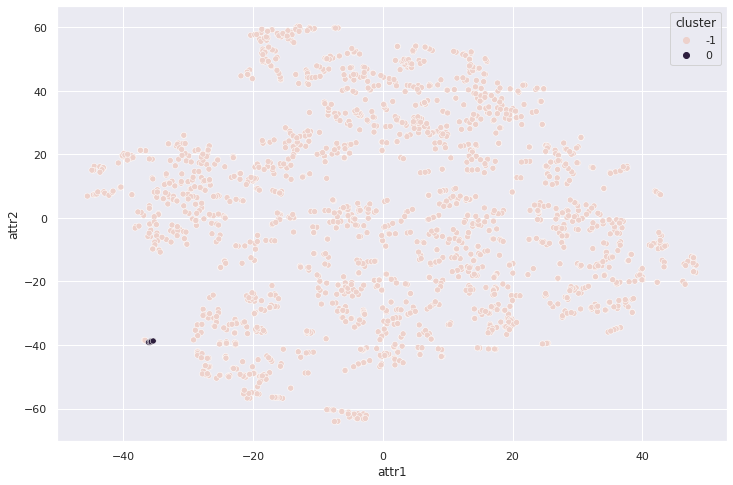

In [ ]:
sns.scatterplot(data=df, x='attr1', y='attr2',hue='cluster')

Precisamos de uma estratégia melhor para estimar os valores dos parâmetros

# Estimando valor para a variável eps (vizinhança) 

In [ ]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

In [ ]:
distances

array([[0.        , 0.02157571, 2.25553127, ..., 3.96045997, 4.03157321,
        4.03201355],
       [0.        , 0.02157571, 2.24035796, ..., 3.97160561, 4.04315048,
        4.05280883],
       [0.        , 0.10855983, 1.82456711, ..., 3.40058664, 3.41310726,
        3.45237373],
       ...,
       [0.        , 0.14182475, 0.23643643, ..., 2.66475077, 2.7089738 ,
        2.76013545],
       [0.        , 0.23643643, 0.35064359, ..., 2.76233484, 2.82786565,
        2.89867912],
       [0.        , 2.43181217, 2.45344154, ..., 4.71916884, 5.09924898,
        5.37141575]])

In [ ]:
pd.DataFrame(np.mean(distances,axis=0))

,0
0,0.000000
1,0.522773
2,1.015729
3,1.393809
4,1.720039
5,2.035810
6,2.323865
7,2.573752
8,2.787967
9,2.990369


# Executando o DBSCAN novamente, mas com um valor mais apropriado para eps



In [ ]:
clustering = DBSCAN(eps=3, min_samples=10).fit(df) 
df['cluster'] = clustering.labels_
df

,attr1,attr2,cluster,outlier
0,1.270457,-26.484255,10,0
1,1.274544,-26.505440,10,0
2,14.631669,-9.029656,13,0
3,14.691931,-8.939358,13,0
4,8.633727,0.808449,-1,0
...,...,...,...,...
1826,-23.833060,-49.713450,37,0
1827,-23.584906,-49.605743,37,0
1828,-23.866812,-49.851200,37,0
1829,-23.742155,-50.052105,37,0


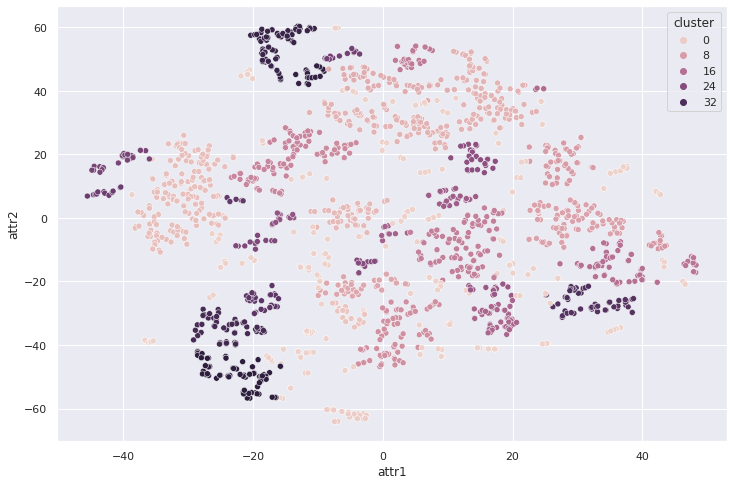

In [ ]:
sns.scatterplot(data=df, x='attr1', y='attr2',hue='cluster')

# Plot do resultado ressaltando os outliers

In [ ]:
df['outlier'] = 0
condition  = (df['cluster'] == -1 )
df.loc[condition, 'outlier'] = 1
df

,attr1,attr2,cluster,outlier
0,1.270457,-26.484255,10,0
1,1.274544,-26.505440,10,0
2,14.631669,-9.029656,13,0
3,14.691931,-8.939358,13,0
4,8.633727,0.808449,-1,1
...,...,...,...,...
1826,-23.833060,-49.713450,37,0
1827,-23.584906,-49.605743,37,0
1828,-23.866812,-49.851200,37,0
1829,-23.742155,-50.052105,37,0


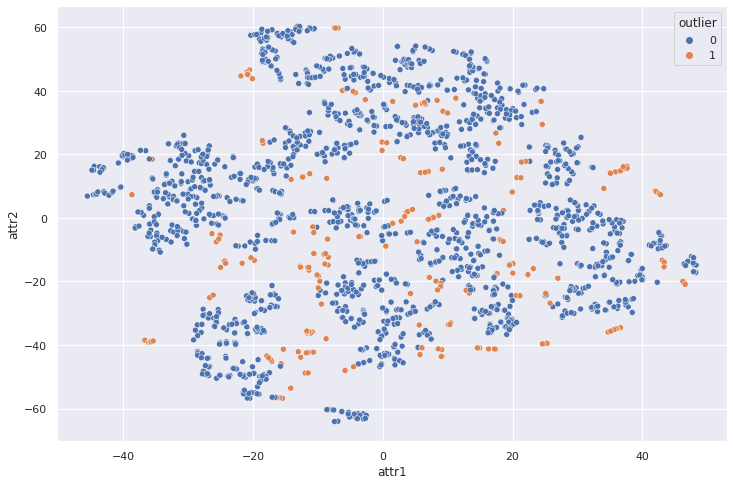

In [ ]:
sns.scatterplot(data=df, x='attr1', y='attr2',hue='outlier')

# Escalabilidade

Acelerando o DBSCAN por meio de uma KD-TREE

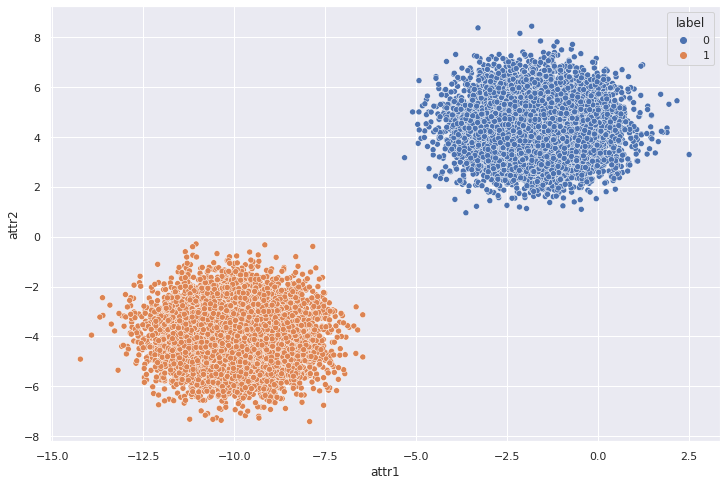

In [ ]:
X, y = make_blobs(n_samples=20000, n_features=2, centers=2, random_state=1)
# reduza a quantidade samples conforme a memória disponível no seu computador
df = pd.DataFrame(X)
df.columns = ['attr1','attr2']
df['label']=y
sns.scatterplot(data=df, x='attr1', y='attr2',hue='label')

Inicialmente, vamos executar o DBSCAN sem nenhuma estratégia para acelerar a busca por vizinhos mais próximos

In [ ]:
t1 = time.perf_counter()
clustering = DBSCAN(eps=3, min_samples=5, algorithm='brute').fit(df) 
t2 = time.perf_counter()
print('Tempo:',t2-t1)


Tempo: 6.146896147999996


Para o mesmo dataset, vamos executar o DBSCAN usando KD-TREE para apoiar a busca por vizinhos mais próximos

In [ ]:
t1 = time.perf_counter()
clustering = DBSCAN(eps=3, min_samples=5, algorithm='kd_tree').fit(df) 
t2 = time.perf_counter()
print('Tempo:',t2-t1)

Tempo: 2.8826183769999716
